## Energy efficiency dataset

Abstract: This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.

dataset from: https://archive.ics.uci.edu/ml/datasets/Energy+efficiency#

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('./ENB2012_data.xlsx')
df.columns = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
             'Overall Height', 'Orientation',' Glazing Area', 'Glazing Area Distribution',
             'Heating Load', 'Cooling Load']

In [3]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [5]:
df.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
 Glazing Area                0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [6]:
df.nunique()

Relative Compactness          12
Surface Area                  12
Wall Area                      7
Roof Area                      4
Overall Height                 2
Orientation                    4
 Glazing Area                  4
Glazing Area Distribution      6
Heating Load                 587
Cooling Load                 636
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Relative Compactness         768 non-null float64
Surface Area                 768 non-null float64
Wall Area                    768 non-null float64
Roof Area                    768 non-null float64
Overall Height               768 non-null float64
Orientation                  768 non-null int64
 Glazing Area                768 non-null float64
Glazing Area Distribution    768 non-null int64
Heating Load                 768 non-null float64
Cooling Load                 768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [8]:
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Text(0.5,1,'Correlation Matrix')

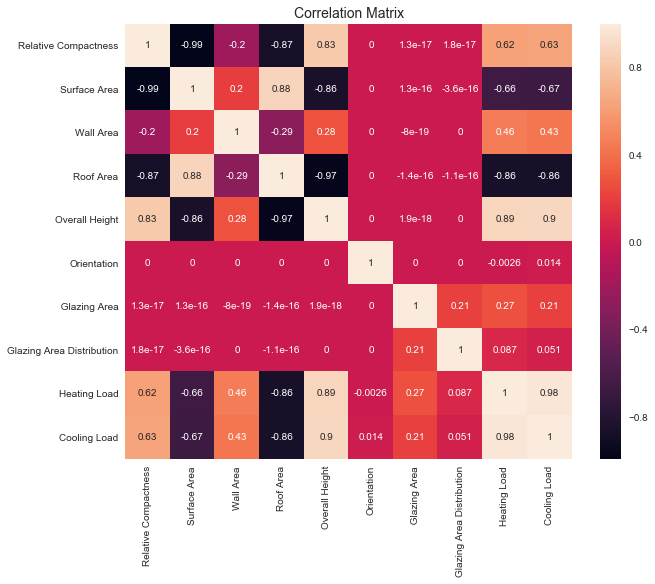

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix', fontsize=14)

In [10]:
df.nunique()

Relative Compactness          12
Surface Area                  12
Wall Area                      7
Roof Area                      4
Overall Height                 2
Orientation                    4
 Glazing Area                  4
Glazing Area Distribution      6
Heating Load                 587
Cooling Load                 636
dtype: int64

Data visualization between the features and the target variable

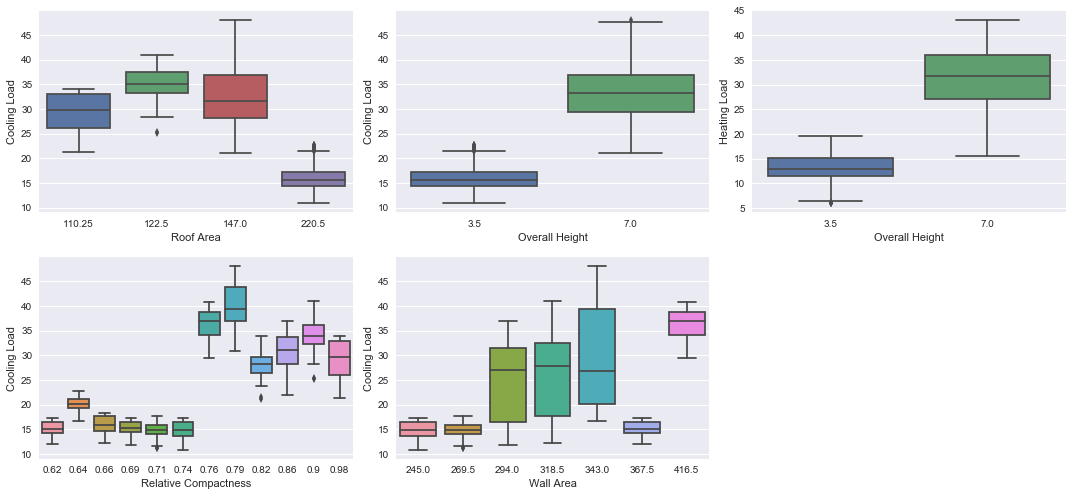

In [11]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)
sns.boxplot(df['Roof Area'], df['Cooling Load']) 
# Not much correlation

plt.subplot(3, 3, 2)
sns.boxplot(df['Overall Height'], df['Cooling Load'])
# The higher the overall height, the increases in the cooling load

plt.subplot(3, 3, 3)
sns.boxplot(df['Overall Height'], df['Heating Load'])
# The higher the height the increases in the heating load

plt.subplot(3, 3, 4)
sns.boxplot(df['Relative Compactness'], df['Cooling Load'])
# There is slight correlation with a higher compactness leads to better cooling load overall

plt.subplot(3, 3, 5)
sns.boxplot(df['Wall Area'], df['Cooling Load'])

plt.tight_layout()

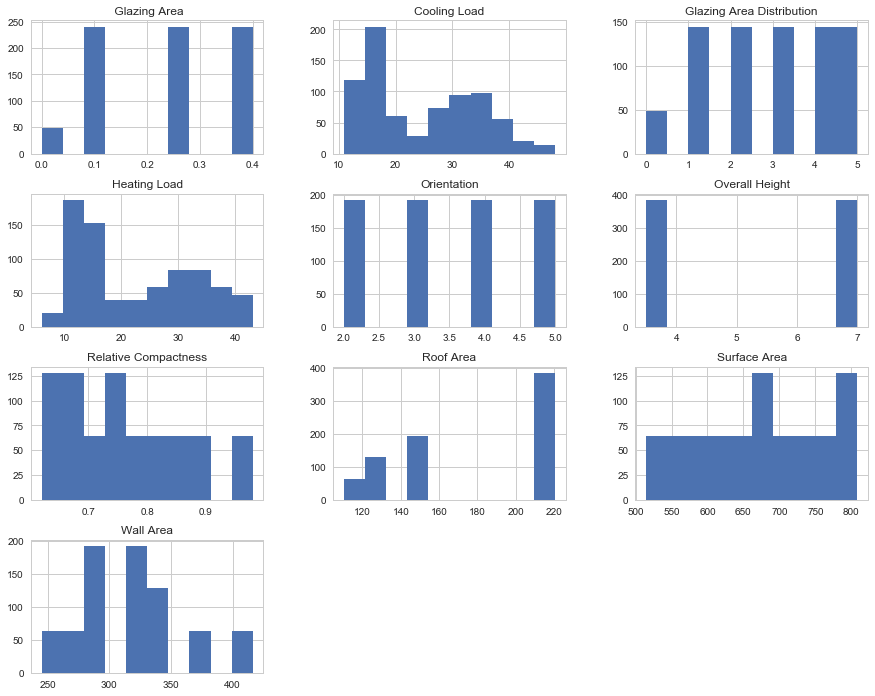

In [23]:
df.hist()
fig = plt.gcf()
sns.set_style('whitegrid')
fig.set_size_inches(15, 12)

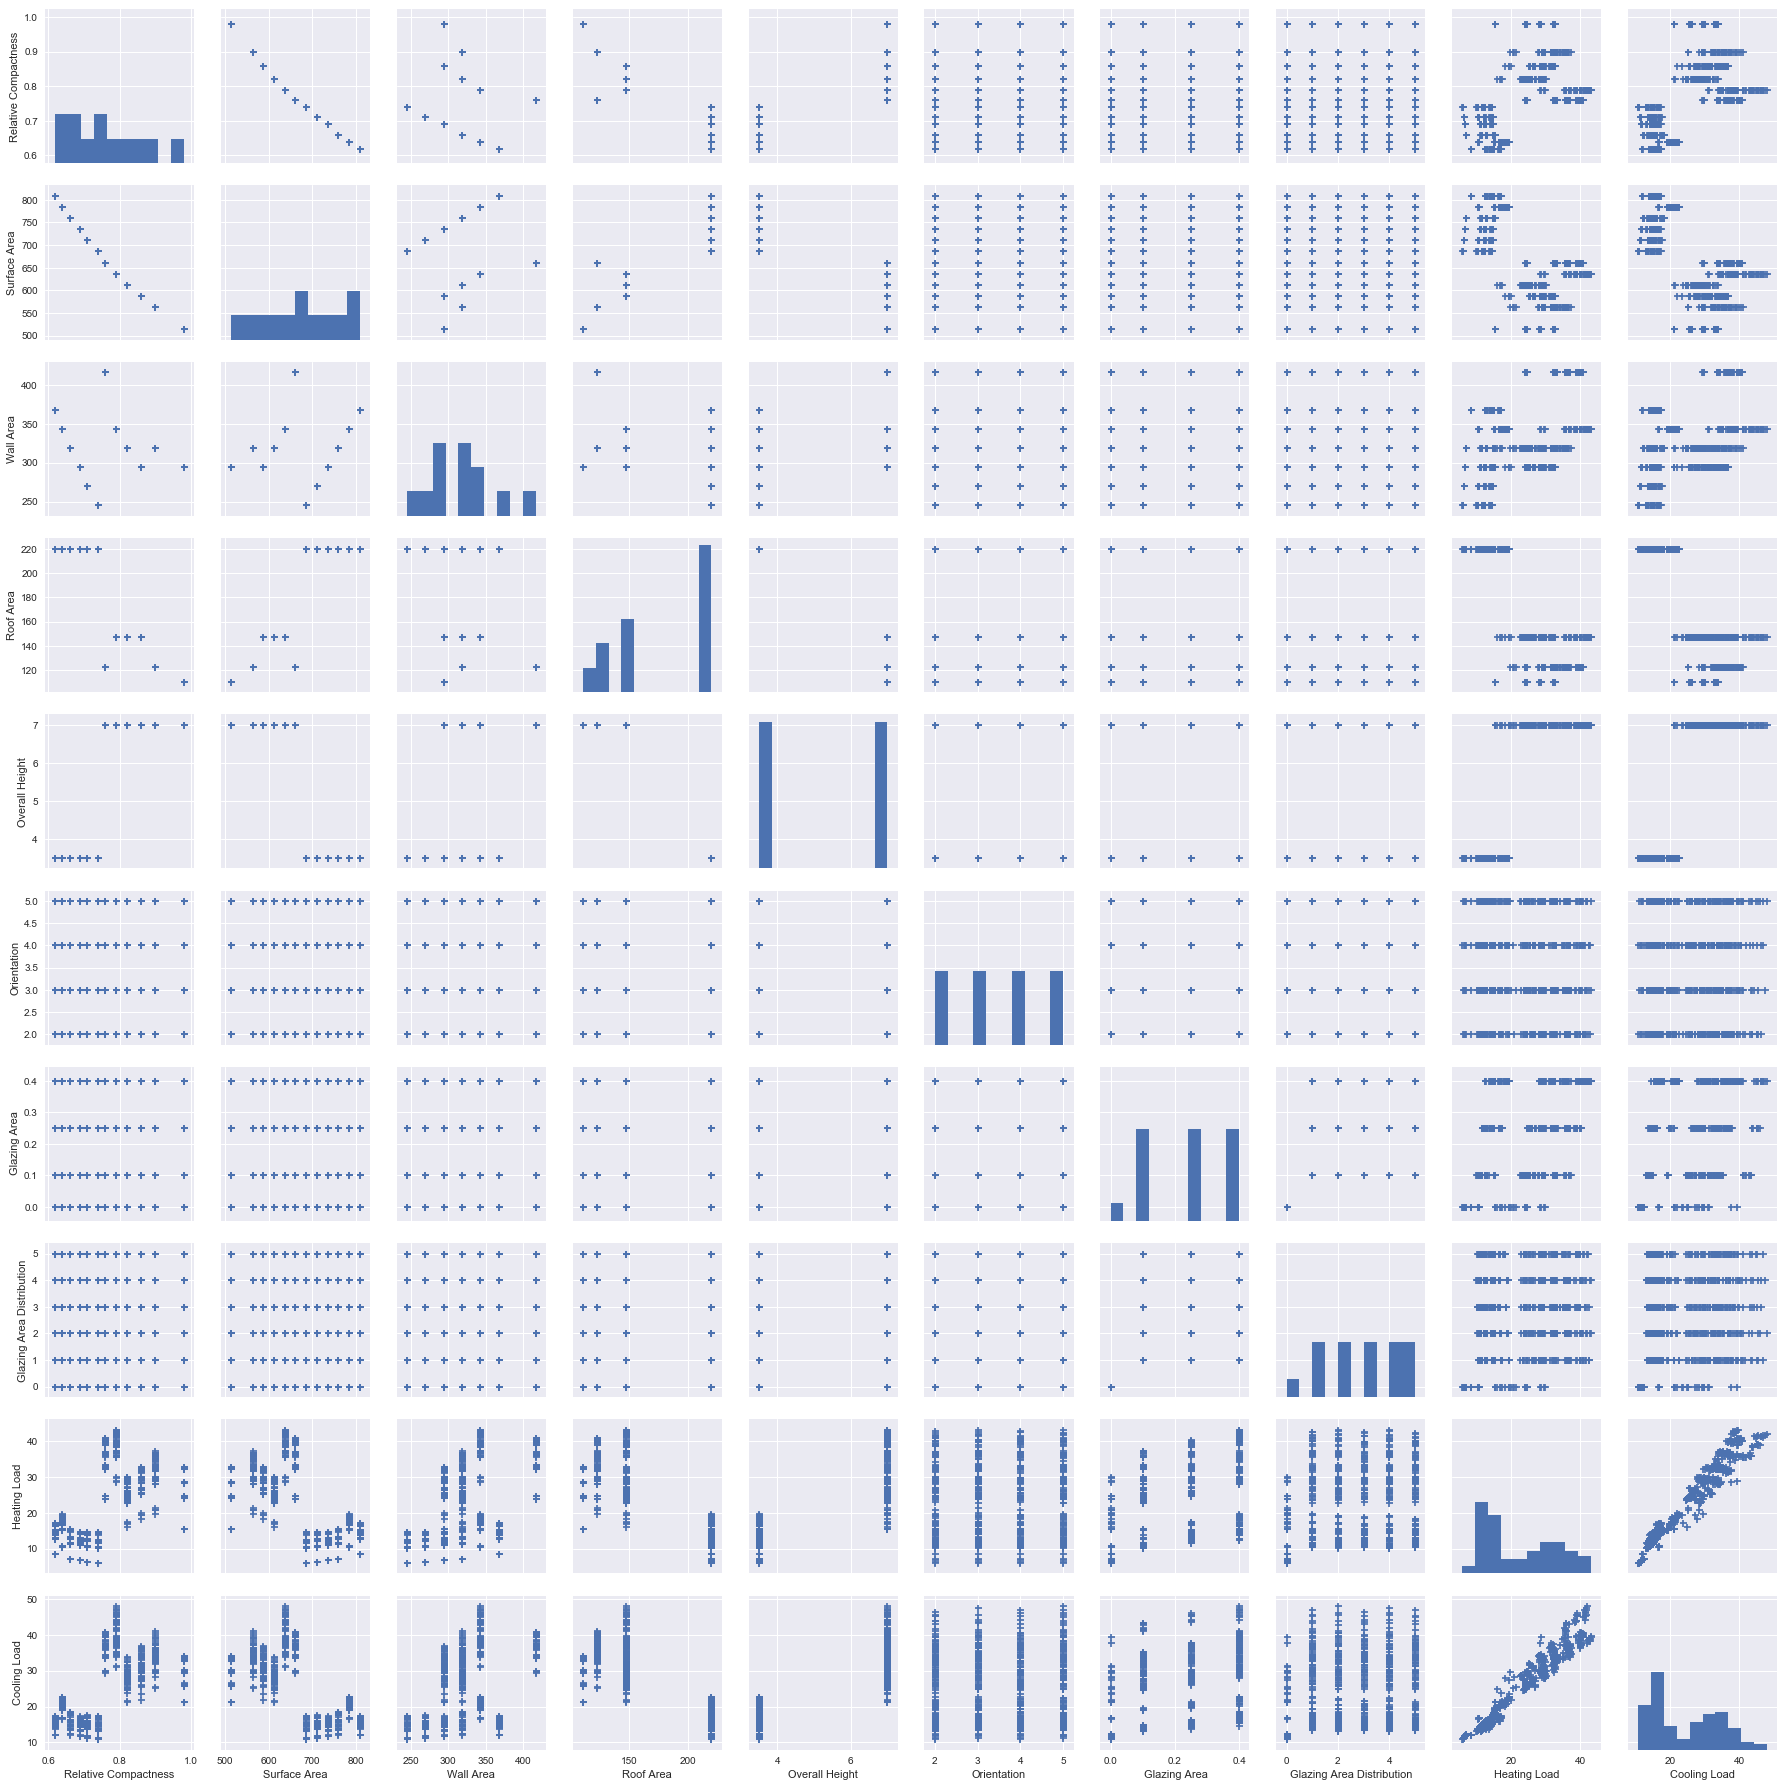

In [30]:
# Pairplot against all features
sns.set(color_codes=True) # Remove whitegrid style
pairplot = sns.pairplot(df, markers='+')
plt.show()

In [14]:
# Let's predict Heating Load
X = df.iloc[:, :-2]
y = df['Heating Load']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_train)
print("\nLinear Regression - Train accuracy (Heating Load)", round(r2_score(y_train, pred), 5))

pred = lr.predict(X_test)
print("\nLinear Regression - Test accuracy (Heating Load)", round(r2_score(y_test, pred), 5))


Linear Regression - Train accuracy (Heating Load) 0.91728

Linear Regression - Test accuracy (Heating Load) 0.91276


In [17]:
X = df.iloc[:, :-2]
y = df['Cooling Load']

lr = LinearRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_train)
print("\nLinear Regression - Train accuracy (Cooling Load)", round(r2_score(y_train, pred), 5))

pred = lr.predict(X_test)
print("\nLinear Regression - Test accuracy (Cooling Load)", round(r2_score(y_test, pred), 5))


Linear Regression - Train accuracy (Cooling Load) 0.91728

Linear Regression - Test accuracy (Cooling Load) 0.91276


Looks like the prediction is not much difference when predicting Heating load vs Cooling load

Possibly try on ridge and lasso regression and see if our error reduces.